In [1]:
import os

# Set the environment variable
os.environ['OMP_NUM_THREADS'] = '6'
import numpy as np
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r"C:\Users\TUFF\Downloads\McDonalds Case Study-20240102T055655Z-001\McDonalds Case Study\mcdonalds.csv",encoding="ISO-8859-1")

In [3]:
df.sample(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1095,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,I love it!+5,52,Once a week,Male
289,No,Yes,No,No,No,Yes,No,No,No,No,No,+3,68,Once a month,Male
677,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,-3,55,Never,Male
227,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+3,27,Once a month,Female
466,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,0,56,Never,Female
375,No,Yes,No,No,No,Yes,No,Yes,No,No,No,+2,58,Once a month,Male
534,No,Yes,No,Yes,Yes,No,No,No,No,No,No,+1,67,Once a year,Female
370,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,+1,48,Once a month,Male
962,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,18,Every three months,Female
846,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+3,24,More than once a week,Female


In [4]:
df.shape

(1453, 15)

In [5]:
df.replace(('Yes','No'),(1,0),inplace=True)

In [6]:
df.sample(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
833,0,1,0,1,1,1,1,0,0,1,0,+1,63,Once a week,Male
685,1,1,0,1,1,1,0,0,1,0,0,+3,39,Once a month,Male
1435,0,1,0,1,1,1,1,0,0,0,1,I hate it!-5,25,Never,Male


In [7]:
result = round(df.iloc[:, 0:11].mean(), 2)


In [8]:
print(result)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
MD = df.iloc[:, 0:11]

In [11]:
scaler = StandardScaler()
MD_standardized = scaler.fit_transform(MD)

In [12]:
pca = PCA()
MD_pca = pca.fit_transform(MD_standardized)


In [13]:
print("Importance of components:")
print(pd.DataFrame({
    'Standard deviation': pca.explained_variance_,
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': pca.explained_variance_ratio_.cumsum()
}, index=[f'PC{i+1}' for i in range(len(pca.explained_variance_))]))

Importance of components:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             2.813166                0.255566               0.255566
PC2             1.632948                0.148348               0.403914
PC3             1.381110                0.125469               0.529383
PC4             1.081711                0.098270               0.627653
PC5             0.918952                0.083484               0.711136
PC6             0.782540                0.071091               0.782227
PC7             0.715334                0.064986               0.847213
PC8             0.592700                0.053845               0.901058
PC9             0.524270                0.047628               0.948686
PC10            0.307814                0.027964               0.976650
PC11            0.257031                0.023350               1.000000


In [14]:
rotation_matrix = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=MD.columns)


In [15]:
rotation_matrix *= -1


In [16]:
print("Rotation (n x k) = (11 x 11):")
print(rotation_matrix.round(3))

Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.407 -0.283  0.260 -0.026 -0.347  0.125 -0.160 -0.017  0.195   
convenient  0.309  0.046  0.317  0.009  0.437 -0.189  0.662 -0.150  0.337   
spicy       0.023 -0.070 -0.020 -0.845  0.186 -0.439 -0.214  0.028 -0.025   
fattening  -0.178  0.206  0.608  0.023 -0.087 -0.108  0.024  0.720 -0.105   
greasy     -0.268  0.136  0.390 -0.331 -0.344  0.278  0.307 -0.487 -0.346   
fast        0.213  0.282  0.211 -0.090  0.569  0.573 -0.392 -0.056 -0.099   
cheap       0.289  0.575 -0.125 -0.114 -0.257 -0.021  0.009  0.065  0.062   
tasty       0.426 -0.242  0.270 -0.073 -0.286  0.053 -0.197 -0.059  0.214   
expensive  -0.291 -0.568  0.183 -0.036  0.207  0.171 -0.015  0.062  0.010   
healthy     0.267 -0.201 -0.368 -0.302 -0.052  0.446  0.449  0.446 -0.219   
disgusting -0.411  0.144 -0.090 -0.235 -0.106  0.328  0.017  0.079  0.781   

             PC10   PC11  
yummy      -0.691 

In [17]:
import matplotlib.pyplot as plt

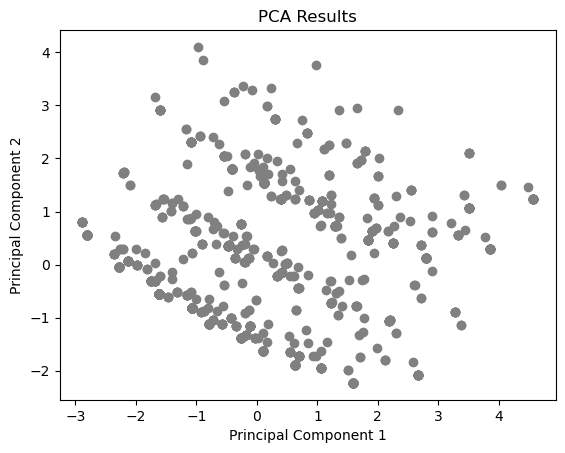

In [18]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

# Set the number of initializations explicitly
kmeans = KMeans(n_clusters=3, n_init=10, random_state=1234)


In [20]:
k_values = range(2, 9)
best_model = None
best_score = float('inf')

In [21]:
for k in k_values:
    # Repeat the clustering multiple times (nrep = 10 in R)
    for _ in range(10):
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(MD_standardized)

In [22]:
 medoids = []
for cluster_label in range(k):
            cluster_points = MD_standardized[labels == cluster_label]
            cluster_center = kmeans.cluster_centers_[cluster_label]
            distances = np.linalg.norm(cluster_points - cluster_center, axis=1)
            medoid_index = np.argmin(distances)
            medoid = cluster_points[medoid_index]
            medoids.append(medoid)


In [23]:
# Calculate the score (you may need to adjust this based on your criterion)
score = np.sum(np.linalg.norm(MD_standardized - np.array(medoids)[labels], axis=1))

In [24]:
 if score < best_score:
            best_score = score
            best_model = kmeans

In [25]:
# Relabel the clusters
labels = best_model.predict(MD_standardized)
MD_kmeans_labels = pd.Series(labels, name='Cluster_Labels')


In [26]:
# Print or use 'MD_kmeans_labels' as needed
print(MD_kmeans_labels)

0       0
1       1
2       2
3       3
4       0
       ..
1448    4
1449    6
1450    1
1451    5
1452    4
Name: Cluster_Labels, Length: 1453, dtype: int32


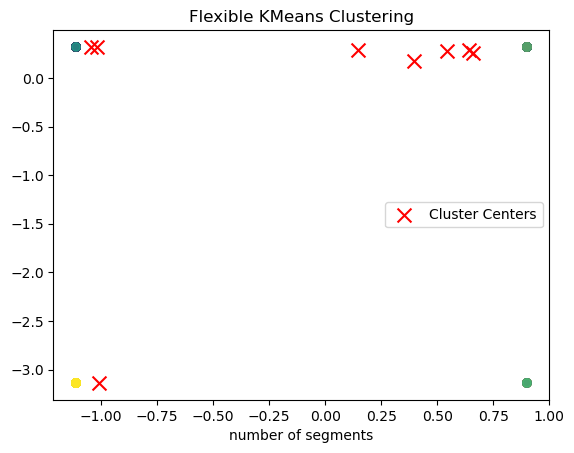

In [27]:
plt.scatter(MD_standardized[:, 0], MD_standardized[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(best_model.cluster_centers_[:, 0], best_model.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Cluster Centers')
plt.xlabel("number of segments")
plt.title("Flexible KMeans Clustering")
plt.legend()
plt.show()

In [28]:

from sklearn.cluster import KMeans
from sklearn.utils import resample

# Assuming 'MD_standardized' contains your standardized data
# and 'best_model' contains the KMeans model with the optimal number of clusters

# Set seed (equivalent to set.seed in R)
np.random.seed(1234)

# Perform bootstrapping for clustering
n_bootstraps = 100
n_clusters = best_model.n_clusters

bootstrap_results = []

for _ in range(n_bootstraps):
    # Resample the data with replacement
    bootstrapped_data = resample(MD_standardized, random_state=np.random.randint(1, 1000), replace=True)

    # Fit KMeans on the bootstrapped data
    bootstrap_kmeans = KMeans(n_clusters=n_clusters)
    bootstrap_labels = bootstrap_kmeans.fit_predict(bootstrapped_data)

    # Store the clustering results
    bootstrap_results.append(bootstrap_labels)

# 'bootstrap_results' now contains the cluster labels from each bootstrap sample

# Print the first 5 bootstrap results
for i, labels in enumerate(bootstrap_results[:5]):
    print(f"Bootstrap {i + 1}: {labels}")

Bootstrap 1: [6 7 7 ... 0 2 0]
Bootstrap 2: [7 4 4 ... 2 7 1]
Bootstrap 3: [0 0 0 ... 0 7 2]
Bootstrap 4: [4 1 1 ... 2 3 5]
Bootstrap 5: [0 4 6 ... 4 2 3]


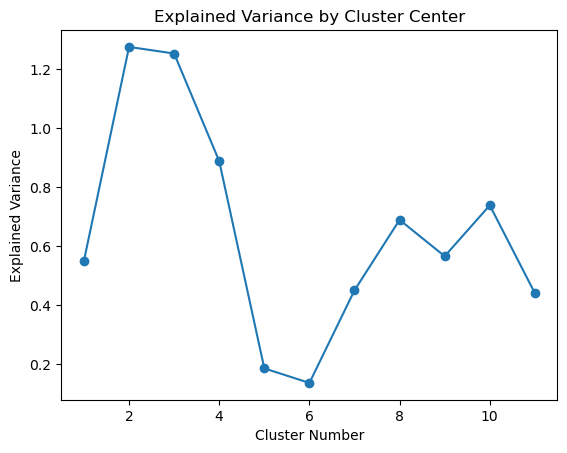

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'MD_x_standardized' contains your standardized data
# and 'best_model' contains the KMeans model with the optimal number of clusters

# Set seed (equivalent to set.seed in R)
np.random.seed(1234)

# Assuming best_model was previously trained on MD_x_standardized
labels = best_model.predict(MD_standardized)

# Calculate cluster centers
cluster_centers = best_model.cluster_centers_

# Calculate the explained variance by each cluster center
explained_variance = np.var(cluster_centers, axis=0)

# Plot a scree plot-like visualization
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Cluster Number')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Cluster Center')
plt.show()

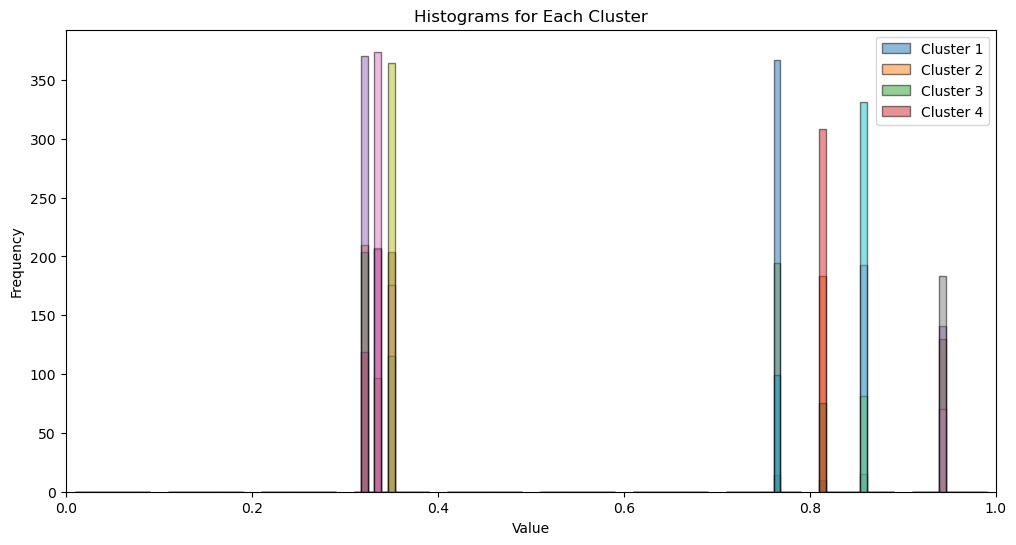

In [30]:
np.random.seed(1234)

# Assuming best_model was previously trained on MD_x_standardized
labels = best_model.predict(MD_standardized)

# Extract values for each cluster
cluster_values = [MD_standardized[labels == i] for i in range(4)]  # Assuming four clusters

# Plot histograms for each cluster
plt.figure(figsize=(12, 6))
#plt.bar(Value, Frequency, width=0.8)

for i, values in enumerate(cluster_values):
    plt.hist(values, bins=np.arange(0, 1.1, 0.1), edgecolor='black', alpha=0.5, label=f'Cluster {i + 1}')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms for Each Cluster')
plt.legend()
plt.xlim(0, 1)
plt.show()

In [31]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming 'MD' contains your data
# You may need to adjust the data preprocessing steps based on your data

# Set seed (equivalent to set.seed in R)
np.random.seed(1234)

# Assuming MD was previously loaded or defined
# You may need to adjust the data preprocessing steps based on your data

# Standardize the data
scaler = StandardScaler()
MD_standardized = scaler.fit_transform(MD)

# Perform model fitting with different numbers of clusters
n_clusters_range = range(2, 9)
results = []

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, n_init=10, random_state=1234)
    gmm.fit(MD_standardized)
    labels = gmm.predict(MD_standardized)
    silhouette_avg = silhouette_score(MD_standardized, labels)
    results.append((n_clusters, silhouette_avg, gmm))

# Print the results
for n_clusters, silhouette_avg, _ in results:
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}')

Number of clusters: 2, Silhouette Score: 0.21431396118952817
Number of clusters: 3, Silhouette Score: 0.19839208720056728
Number of clusters: 4, Silhouette Score: 0.2240504761826758
Number of clusters: 5, Silhouette Score: 0.20373754474866915
Number of clusters: 6, Silhouette Score: 0.21871238575982707
Number of clusters: 7, Silhouette Score: 0.2238755362813208
Number of clusters: 8, Silhouette Score: 0.25683108598986715


In [32]:

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming 'MD' contains your data
# You may need to adjust the data preprocessing steps based on your data

# Set seed (equivalent to set.seed in R)
np.random.seed(1234)

# Assuming MD was previously loaded or defined
# You may need to adjust the data preprocessing steps based on your data

# Standardize the data
scaler = StandardScaler()
MD_standardized = scaler.fit_transform(MD)

# Perform latent class analysis with different numbers of components
n_components_range = range(2, 9)
results = []

for n_components in n_components_range:
    model = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234)
    model.fit(MD_standardized)
    results.append((n_components, model.aic(MD_standardized), model.bic(MD_standardized)))

# Print the results
for n_components, aic, bic in results:
    print(f'Number of components: {n_components}, AIC: {aic}, BIC: {bic}')

Number of components: 2, AIC: 887.0122605235877, BIC: 1705.6270383769815
Number of components: 3, AIC: 2617.7888483231227, BIC: 3848.3517079349986
Number of components: 4, AIC: -1129.738591815113, BIC: 512.772349555245
Number of components: 5, AIC: -16844.73424558161, BIC: -14790.27522245277
Number of components: 6, AIC: -20370.287902947945, BIC: -17903.88079806062
Number of components: 7, AIC: -26193.641923991672, BIC: -23315.28673734587
Number of components: 8, AIC: -47036.4675388793, BIC: -43746.16427047501


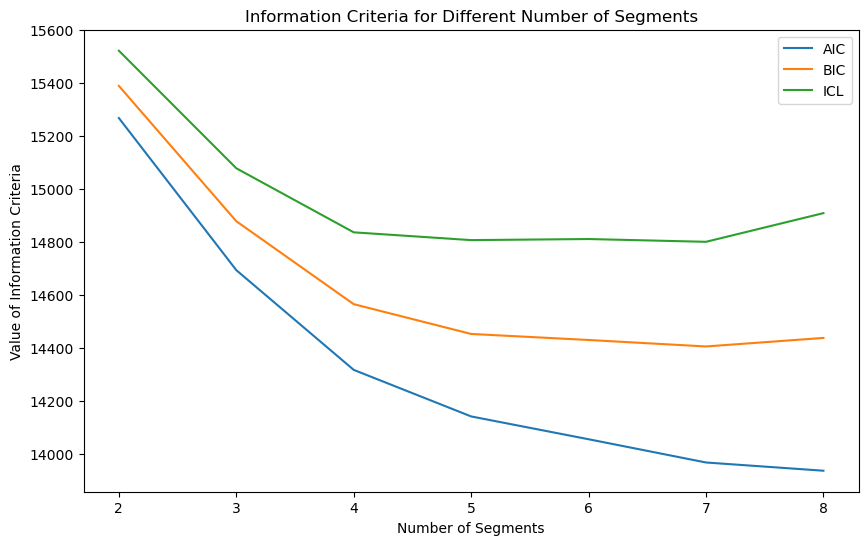

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named MD_m28 with AIC, BIC, ICL values for different segments
# Adjust the column names accordingly

# Example data
MD_m28 = pd.DataFrame({
    'Segments': [2, 3, 4, 5, 6, 7, 8],
    'AIC': [15267.70, 14693.07, 14316.29, 14140.41, 14054.22, 13966.38, 13935.28],
    'BIC': [15389.17, 14877.92, 14564.52, 14452.01, 14429.20, 14404.73, 14437.01],
    'ICL': [15522.10, 15077.96, 14835.95, 14806.54, 14810.65, 14800.16, 14908.52]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Segments', y='AIC', data=MD_m28, label='AIC')
sns.lineplot(x='Segments', y='BIC', data=MD_m28, label='BIC')
sns.lineplot(x='Segments', y='ICL', data=MD_m28, label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria for Different Number of Segments')
plt.legend()
plt.show()


In [34]:

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Assuming you have a DataFrame named MD_x with your data
# Adjust the column names and data accordingly

# Example data
MD_x = pd.DataFrame({
    'Feature1': np.random.rand(800),
    'Feature2': np.random.rand(800),
    'Feature3': np.random.rand(800),
})

# Assuming you have clusters from KMeans
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_x['KMeans_Cluster'] = kmeans.fit_predict(MD_x[['Feature1', 'Feature2', 'Feature3']])

# Initialize Gaussian Mixture model with KMeans cluster memberships
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=1234,
                      init_params='kmeans', n_init=1, means_init=kmeans.cluster_centers_)
MD_x['GMM_Cluster'] = gmm.fit_predict(MD_x[['Feature1', 'Feature2', 'Feature3']])

# Create a confusion matrix to compare clusters
conf_matrix = confusion_matrix(MD_x['KMeans_Cluster'], MD_x['GMM_Cluster'])
print(conf_matrix)


[[174  17  12   0]
 [  5 182   0   5]
 [  5  19 157  32]
 [  7   3   0 182]]


In [35]:

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named mcdonalds with your data
# Adjust the column names and data accordingly

# Example data
mcdonalds = pd.DataFrame({
    'yummy': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'convenient': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'spicy': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'fattening': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'greasy': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'fast': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'cheap': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'tasty': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'expensive': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'healthy': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'disgusting': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Like_n': [152, 71, 73, 59, 58, 169, 152, 187, 229, 160]
})

# Create a DataFrame for linear regression
regression_data = mcdonalds.iloc[:, :-1]

# Standardize the data
scaler = StandardScaler()
regression_data_standardized = scaler.fit_transform(regression_data)

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10)
cluster_assignments = gmm.fit_predict(regression_data_standardized)

# Output cluster assignments
print("Cluster Assignments:", cluster_assignments)


Cluster Assignments: [1 1 1 0 0 1 1 1 0 0]


In [36]:

import statsmodels.api as sm

# Assuming you have a DataFrame named mcdonalds with your data
# Adjust the column names and data accordingly

# Example data
mcdonalds = pd.DataFrame({
    'yummyYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'convenientYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'spicyYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'fatteningYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'greasyYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'fastYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'cheapYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'tastyYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'expensiveYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'healthyYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'disgustingYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Like_n': [152, 71, 73, 59, 58, 169, 152, 187, 229, 160]
})

# Create a model formula
formula = "Like_n ~ yummyYes + convenientYes + spicyYes + fatteningYes + greasyYes + fastYes + cheapYes + tastyYes + expensiveYes + healthyYes + disgustingYes"

# Fit the linear regression model
model = sm.OLS.from_formula(formula, data=mcdonalds)
result = model.fit()

# Output the summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.2455
Date:                Thu, 04 Jan 2024   Prob (F-statistic):              0.634
Time:                        21:18:10   Log-Likelihood:                -54.604
No. Observations:                  10   AIC:                             113.2
Df Residuals:                       8   BIC:                             113.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       152.1500     47.189      3.224